# Setting up the matrix
---

In [3]:
from walker import *
from grid import *
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.sparse as sp
import scipy.sparse.linalg as lg
from numba import jit
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from dask.distributed import Client
from dask import delayed, compute
import matplotlib.path as mplpath
import time
import os
import sys
import seaborn as sns
import palettable as pl
sns.set()

In [2]:
client=Client()

In [3]:
client

Client Scheduler: tcp://127.0.0.1:50004 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 8.47 GB


## Some timings
---

In [4]:
# max_idx_dict = {}
# timing = {}
# s = time.time()
# for g in range(1,6):
#     for p in range(10):
#         print(g, p, "elapsed time:\t", time.time()-s)
#         start = time.time()
#         pdict = koch_walker(depth=g, points_between=p)
#         end = time.time()- start
#         save_grid(pdict, g, p)
#         timing[tuple((g,p))] = end
#         pl = np.array(list(pdict))
#         midx = normalize(pl)
#         max_idx_dict[tuple((g,p))] = midx

In [5]:
# np.save("max_idx_dict", max_idx_dictidx_dict)
# np.save("timings_dict", timing)

In [6]:
# for k,v in max_idx_dict.items():    
#     diag = np.ones(v**2)
#     diag0 = -4*diag
#     diagx = diag[:-1]
#     diagy = diag[:-v]
#     M = scipy.sparse.diags([diagy, diagx, diag0, diagx, diagy], [-v, -1, 0,1,v], format="csr")
#     st = time.time()
#     e, v = scipy.sparse.linalg.eigs(M)
#     en = time.time()-st
#     np.save(f"solution_time_g_p={k}",[en])

In [7]:
a = np.load("solution_times.npy", allow_pickle=True).item()
a # Solution times for eigenvalues

{(1, 0): 0.005984783172607422,
 (1, 1): 0.006985187530517578,
 (1, 2): 0.009947061538696289,
 (1, 3): 0.017978191375732422,
 (1, 4): 0.02892327308654785,
 (1, 5): 0.03490638732910156,
 (1, 6): 0.0382533073425293,
 (1, 7): 0.04686403274536133,
 (1, 8): 0.07021594047546387,
 (1, 9): 0.07810688018798828,
 (2, 0): 0.031241893768310547,
 (2, 1): 0.06248617172241211,
 (2, 2): 0.21869802474975586,
 (2, 3): 0.4061555862426758,
 (2, 4): 0.6873390674591064,
 (2, 5): 1.316129207611084,
 (2, 6): 3.1398866176605225,
 (2, 7): 8.228384494781494,
 (2, 8): 17.11416506767273,
 (2, 9): 17.493241786956787,
 (3, 0): 0.5770490169525146,
 (3, 1): 9.216877937316895,
 (3, 2): 38.669018507003784,
 (3, 3): 245.51676487922668,
 (3, 4): 448.7304961681366,
 (3, 5): 885.4415857791901}

In [8]:
midx_d = np.load("max_idx_dict.npy", allow_pickle=True).item()
midx_d # Max index

{(1, 0): 6,
 (1, 1): 12,
 (1, 2): 18,
 (1, 3): 24,
 (1, 4): 30,
 (1, 5): 36,
 (1, 6): 42,
 (1, 7): 48,
 (1, 8): 54,
 (1, 9): 60,
 (2, 0): 26,
 (2, 1): 52,
 (2, 2): 78,
 (2, 3): 104,
 (2, 4): 130,
 (2, 5): 156,
 (2, 6): 182,
 (2, 7): 208,
 (2, 8): 234,
 (2, 9): 260,
 (3, 0): 106,
 (3, 1): 212,
 (3, 2): 318,
 (3, 3): 424,
 (3, 4): 530,
 (3, 5): 636,
 (3, 6): 742,
 (3, 7): 848,
 (3, 8): 954,
 (3, 9): 1060,
 (4, 0): 426,
 (4, 1): 852,
 (4, 2): 1278,
 (4, 3): 1704,
 (4, 4): 2130,
 (4, 5): 2556,
 (4, 6): 2982,
 (4, 7): 3408,
 (4, 8): 3834,
 (4, 9): 4260,
 (5, 0): 1706,
 (5, 1): 3412,
 (5, 2): 5118,
 (5, 3): 6824,
 (5, 4): 8530,
 (5, 5): 10236,
 (5, 6): 11942,
 (5, 7): 13648,
 (5, 8): 15354,
 (5, 9): 17060}

---

In [4]:
g = 4 # recursion depth
pts = 1 # points between each corner of the fractal
path = f"boundary_grids/{g}_{pts}.npy"
if os.path.exists(path):
    position_dict = np.load(path, allow_pickle=True).item()
else:
    %time position_dict = koch_walker(depth=g, points_between=pts)
    save_grid(position_dict, g, pts)
pos_list = np.array(list(position_dict))
max_idx = normalize(pos_list)
%time normalized_dict = {tuple(p):True for p in pos_list}
max_idx

Wall time: 94.7 ms


852

In [10]:
# plt.style.available

(4, 1)

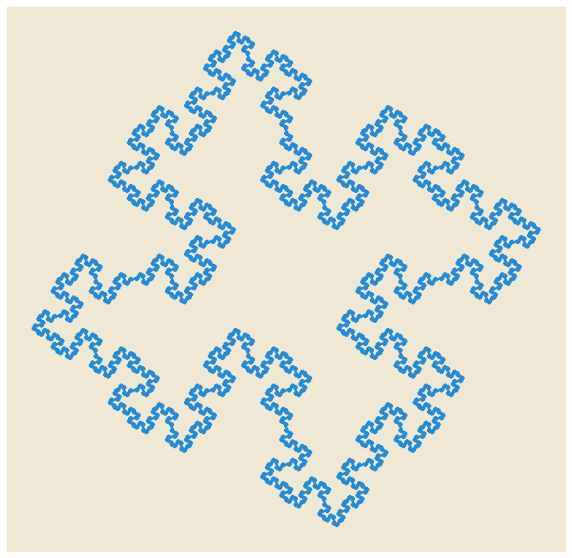

In [5]:
%matplotlib inline
#cmap = pl.scientific.diverging.Berlin_10.colors
plt.style.use('Solarize_Light2')
plt.figure(figsize=(10,10), frameon=False)
plot_list = [*pos_list, pos_list[0]]
plt.plot(*zip(*plot_list))
plt.xticks([])
plt.yticks([])
g, pts

## Create matplotlib path

In [6]:
path =mplpath.Path(pos_list)

## test if we can daskify the path

In [ ]:
%%time
all_points = [(i,j) for i in range(max_idx) for j in range(max_idx)]
cont = []
for p in all_points:
    contains = delayed(path.contains_point)(p)
    cont.append(contains)
contains = compute(cont)[0]

----

In [14]:
%load_ext autoreload
%autoreload 2

In [ ]:
from eqsolver import get_matrix, fix_matrix

In [ ]:
g, pts, max_idx

In [ ]:
# %time all_points = [(i,j) for i in range(max_idx) for j in range(max_idx)]
# %time contains = np.array([path.contains_point(p) for p in all_points]).reshape((max_idx, max_idx))
%time A = get_matrix(max_idx)


In [ ]:
%time fix_matrix(A, max_idx, boundary_dict=normalized_dict, contains=contains)

In [ ]:
emr = pl.cartocolors.sequential.Emrld_7.get_mpl_colormap()
# all_points = [(i,j) for i in range(max_idx) for j in range(max_idx)]
f = np.zeros((max_idx, max_idx))
# c = np.array([path.contains_point(p) for p in all_points]).reshape((max_idx, max_idx))
f[contains] += 1
#lt.style.use("")
fig, ax = plt.subplots(figsize=(10,10), frameon=True)
ax.matshow(f.T, cmap = emr)
ax.plot(*zip(*plot_list), 'k', lw=3)
ax.grid()
ax.autoscale(False)
# ax.set_xlim(0,max_idx)
# ax.set_ylim(0,max_idx)
fig.savefig(f"classification_{g}_{pts}.png")
g,pts

In [ ]:
k=100
g, pts, k

In [ ]:
pathstr = f"solutions/solution_{g}_{pts}_{k}"

In [ ]:
%time so = scipy.sparse.linalg.eigs(A, which="LM", k=k)
np.save(pathstr, so)

In [ ]:
m = np.ma.array(v[:,0].reshape((max_idx, max_idx)), mask = np.invert(c))

In [ ]:
plt.contourf(m.T)
plt.plot(*zip(*plot_list))
plt.colorbar()

In [ ]:
# plt.contourf(v[:,0].reshape(shape) / e[0])
plt.figure(figsize=(15, 15))
plt.contourf(tmp[0].T, cmap=emr, levels=max_idx)
plt.plot(*zip(*plot_list))
plt.colorbar()

In [ ]:
iN = 200
diag = np.ones(N**2)
diag0 = -4*diag
diagx = diag[:-1]
diagy = diag[:-N]
M = scipy.spars/e.diags([diagy, diagx, diag0, diagx, diagy], [-N, -1, 0,1,N], format="csr")
e, v = scipy.sparse.linalg.eigs(M)
plt.contourf(v[:,0].reshape((N, N))/ e[0])
plt.colorbar()